# Problem Set 1: Return Calculations, Portfolio Choice and Mean-Variance Frontier

## Task 1: Return Comparison

### a)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from collections import deque
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('PS1 - Data.csv', index_col = 0)
# Discrete Monthly Returns
returns = pd.DataFrame(index = data.index, columns = data.columns)
for column in returns.columns:
    returns[column] = data[column].pct_change(periods = 1)
returns = returns.iloc[1:,:]
print(returns.head(n = 5))

            DEUTSCHE_BANK   ALLIANZ      BASF   SIEMENS       BMW     BAYER  \
1996-08-23       0.005421  0.035851  0.085921  0.023022  0.018961  0.062685   
1996-09-23      -0.029687 -0.004419  0.082109  0.003933  0.011622  0.038204   
1996-10-23      -0.004588  0.029361  0.029044  0.011900  0.033911  0.042568   
1996-11-23      -0.003359  0.007230  0.085472 -0.104982  0.039467  0.019031   
1996-12-23       0.000293 -0.003587  0.113851 -0.001529  0.128339  0.032261   

                E_ON       RWE    HENKEL       SAP  
1996-08-23  0.027119  0.030107  0.015875  0.106914  
1996-09-23  0.015450  0.031968  0.015520  0.063693  
1996-10-23  0.057710  0.146010  0.027635 -0.176907  
1996-11-23  0.035129  0.027803  0.126821 -0.048978  
1996-12-23  0.023631 -0.012378 -0.026487  0.075002  


In [3]:
log_returns = np.log(1 + returns)
print(log_returns.head(n = 5))

            DEUTSCHE_BANK   ALLIANZ      BASF   SIEMENS       BMW     BAYER  \
1996-08-23       0.005407  0.035223  0.082428  0.022761  0.018784  0.060798   
1996-09-23      -0.030137 -0.004429  0.078912  0.003925  0.011555  0.037492   
1996-10-23      -0.004598  0.028938  0.028630  0.011830  0.033349  0.041687   
1996-11-23      -0.003365  0.007204  0.082015 -0.110911  0.038708  0.018853   
1996-12-23       0.000293 -0.003594  0.107823 -0.001530  0.120747  0.031752   

                E_ON       RWE    HENKEL       SAP  
1996-08-23  0.026758  0.029662  0.015750  0.101576  
1996-09-23  0.015332  0.031467  0.015401  0.061747  
1996-10-23  0.056106  0.136286  0.027260 -0.194687  
1996-11-23  0.034526  0.027424  0.119400 -0.050218  
1996-12-23  0.023356 -0.012455 -0.026844  0.072323  


In [4]:
mean_returns = returns.mean()
print(mean_returns)

DEUTSCHE_BANK    0.005781
ALLIANZ          0.009765
BASF             0.012841
SIEMENS          0.012938
BMW              0.012715
BAYER            0.008714
E_ON             0.006305
RWE              0.007659
HENKEL           0.010174
SAP              0.014813
dtype: float64


In [5]:
mean_log_returns = log_returns.mean()
print(mean_log_returns)

DEUTSCHE_BANK   -0.001734
ALLIANZ          0.004535
BASF             0.009312
SIEMENS          0.007988
BMW              0.008206
BAYER            0.004945
E_ON             0.003171
RWE              0.003527
HENKEL           0.008016
SAP              0.009443
dtype: float64


In [6]:
std_log_returns = log_returns.std()
print(std_log_returns)

DEUTSCHE_BANK    0.123725
ALLIANZ          0.103587
BASF             0.084579
SIEMENS          0.100254
BMW              0.095559
BAYER            0.087519
E_ON             0.079970
RWE              0.091935
HENKEL           0.065799
SAP              0.104463
dtype: float64


In [7]:
std_returns = returns.std()
print(std_returns)

DEUTSCHE_BANK    0.123125
ALLIANZ          0.101044
BASF             0.081873
SIEMENS          0.097924
BMW              0.093502
BAYER            0.085710
E_ON             0.077994
RWE              0.089498
HENKEL           0.064351
SAP              0.101566
dtype: float64


In [8]:
mean_returns_ann = mean_returns * 12
print(mean_returns_ann)

DEUTSCHE_BANK    0.069372
ALLIANZ          0.117179
BASF             0.154088
SIEMENS          0.155251
BMW              0.152583
BAYER            0.104574
E_ON             0.075657
RWE              0.091904
HENKEL           0.122083
SAP              0.177752
dtype: float64


In [9]:
mean_log_returns_ann = mean_log_returns * 12
print(mean_log_returns_ann)

DEUTSCHE_BANK   -0.020805
ALLIANZ          0.054416
BASF             0.111738
SIEMENS          0.095857
BMW              0.098470
BAYER            0.059340
E_ON             0.038057
RWE              0.042329
HENKEL           0.096194
SAP              0.113320
dtype: float64


### b)

In [10]:
stocks = data.columns
differences = pd.DataFrame(columns = stocks)
max_differences =  pd.DataFrame(columns = stocks, index = ['max_diff'])
for stock in stocks:
    diff = np.abs(returns[stock] - log_returns[stock])
    max_diff = diff.max()
    max_differences.loc['max_diff', stock] = max_diff
print(max_differences)
print('\nLargest max discrete-log difference:', max_differences.loc['max_diff',:].max(), '(DEUTSCHE_BANK)')
print('\nSmallest max discrete-log difference:', max_differences.loc['max_diff',:].min(), '(E_ON)')

         DEUTSCHE_BANK   ALLIANZ      BASF   SIEMENS      BMW     BAYER  \
max_diff      0.225127  0.133743  0.076351  0.092679  0.09344  0.080488   

              E_ON       RWE   HENKEL      SAP  
max_diff  0.054059  0.096935  0.07233  0.10342  

Largest max discrete-log difference: 0.22512696771345952 (DEUTSCHE_BANK)

Smallest max discrete-log difference: 0.05405919751851518 (E_ON)


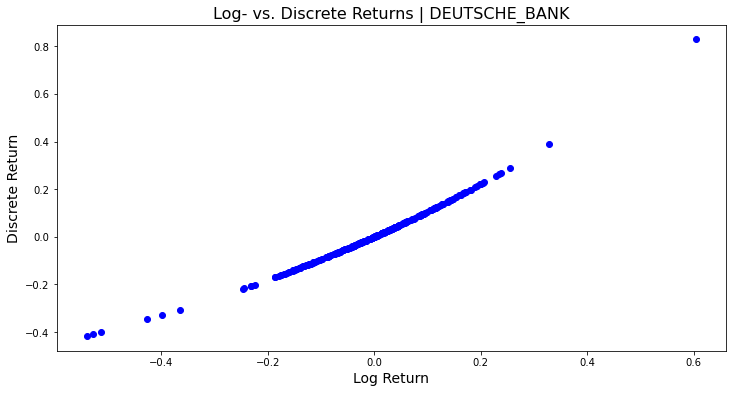

In [11]:
plt.figure(figsize = (12,6))
plt.plot(log_returns['DEUTSCHE_BANK'], returns['DEUTSCHE_BANK'], linestyle = "None", marker = 'o', color = 'blue')
plt.title('Log- vs. Discrete Returns | DEUTSCHE_BANK', size = 16)
plt.xlabel('Log Return', size = 14)
plt.ylabel('Discrete Return', size = 14)
plt.show()

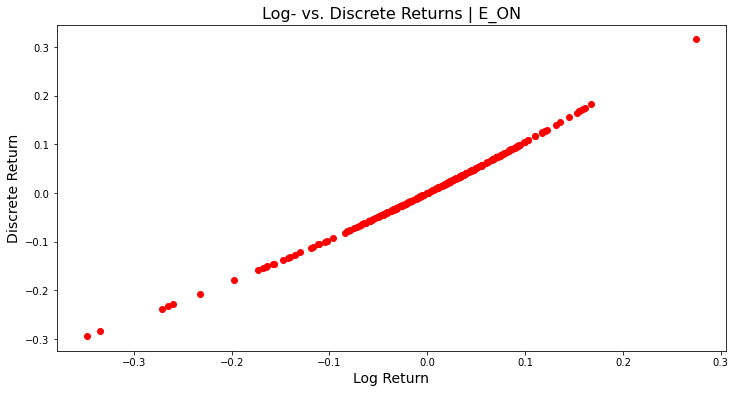

In [12]:
plt.figure(figsize = (12,6))
plt.plot(log_returns['E_ON'], returns['E_ON'], linestyle = "None", marker = 'o', color = 'red')
plt.title('Log- vs. Discrete Returns | E_ON', size = 16)
plt.xlabel('Log Return', size = 14)
plt.ylabel('Discrete Return', size = 14)
plt.show()

### c)

seen in the solution sheet

### d)

In [13]:
stocks = data.columns
investment = 100
weights = np.array([1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10])
portfolio = investment * weights.T

portfolio_returns = pd.DataFrame(index = data.index, columns = ['portfolio_value', 'portfolio_return'])
portfolio_returns.loc[data.index[0], 'portfolio_value'] = 100
portfolio_returns.loc[data.index[0], 'portfolio_return'] = np.nan
for i, j in zip(returns.index, range(0, len(data.index))):
    portfolio = portfolio * (1+returns.loc[i, :])
    portfolio_value = np.sum(portfolio)
    portfolio_returns.loc[i, 'portfolio_value'] = portfolio_value
portfolio_returns['portfolio_return'] = portfolio_returns['portfolio_value'].pct_change()
portfolio_returns.drop(columns = ['portfolio_value'], inplace = True)
print("\nMonthly returns of an equally weighted portfolio:\n\n", portfolio_returns)
print(f"\nPortfolio value at end of July 2021: {round(portfolio_value, 2)} EUR")


Monthly returns of an equally weighted portfolio:

             portfolio_return
1996-07-23               NaN
1996-08-23          0.041188
1996-09-23          0.023653
1996-10-23          0.017798
1996-11-23          0.020486
...                      ...
2021-03-23          0.063104
2021-04-23          0.052001
2021-05-23         -0.000344
2021-06-23         -0.012007
2021-07-23         -0.003173

[301 rows x 1 columns]

Portfolio value at end of July 2021: 814.91 EUR


## Task 2: Diversification Effect

In [14]:
returns_std = (returns.std())
stocks_std = (data.std())
print(returns_std.head(n = 10), '\n')
print(stocks_std.head(n = 10))

DEUTSCHE_BANK    0.123125
ALLIANZ          0.101044
BASF             0.081873
SIEMENS          0.097924
BMW              0.093502
BAYER            0.085710
E_ON             0.077994
RWE              0.089498
HENKEL           0.064351
SAP              0.101566
dtype: float64 

DEUTSCHE_BANK     492.758343
ALLIANZ          2086.380023
BASF             4333.740777
SIEMENS          1494.230988
BMW              5393.845965
BAYER            2878.420450
E_ON             1320.472120
RWE              1067.272068
HENKEL            389.509901
SAP              8620.440474
dtype: float64


### a)

In [15]:
cov_matrix = returns.cov()
print(cov_matrix)

               DEUTSCHE_BANK   ALLIANZ      BASF   SIEMENS       BMW  \
DEUTSCHE_BANK       0.015160  0.008667  0.006578  0.007501  0.006186   
ALLIANZ             0.008667  0.010210  0.005649  0.006443  0.005529   
BASF                0.006578  0.005649  0.006703  0.005407  0.005554   
SIEMENS             0.007501  0.006443  0.005407  0.009589  0.005697   
BMW                 0.006186  0.005529  0.005554  0.005697  0.008743   
BAYER               0.004928  0.005340  0.004547  0.004596  0.004408   
E_ON                0.004302  0.003834  0.003235  0.003286  0.002578   
RWE                 0.003993  0.004163  0.003265  0.003084  0.002879   
HENKEL              0.004026  0.003725  0.003475  0.003400  0.003642   
SAP                 0.005151  0.004963  0.003786  0.006058  0.004736   

                  BAYER      E_ON       RWE    HENKEL       SAP  
DEUTSCHE_BANK  0.004928  0.004302  0.003993  0.004026  0.005151  
ALLIANZ        0.005340  0.003834  0.004163  0.003725  0.004963  
BASF     

### b)

In [16]:
# Calculate return standard deviation and sort from high to low
returns_std = returns_std.sort_values(ascending = False)
print(returns_std)

DEUTSCHE_BANK    0.123125
SAP              0.101566
ALLIANZ          0.101044
SIEMENS          0.097924
BMW              0.093502
RWE              0.089498
BAYER            0.085710
BASF             0.081873
E_ON             0.077994
HENKEL           0.064351
dtype: float64


In [17]:
# Portfolio Stocks
df1 = data[['DEUTSCHE_BANK']]
df2 = data[['DEUTSCHE_BANK', "SAP"]]
df3 = data[['DEUTSCHE_BANK', "SAP", "ALLIANZ"]]
df4 = data[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS"]]
df5 = data[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW"]]
df6 = data[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW", "RWE"]]
df7 = data[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW", "RWE", "BAYER"]]
df8 = data[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW", "RWE", "BAYER", "BASF"]]
df9 = data[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW", "RWE", "BAYER", "BASF", "E_ON"]]
df10 = data[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW", "RWE", "BAYER", "BASF", "E_ON", "HENKEL"]]

# Portfolio Stock Returns
rdf1 = returns[['DEUTSCHE_BANK']]
rdf2 = returns[['DEUTSCHE_BANK', "SAP"]]
rdf3 = returns[['DEUTSCHE_BANK', "SAP", "ALLIANZ"]]
rdf4 = returns[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS"]]
rdf5 = returns[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW"]]
rdf6 = returns[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW", "RWE"]]
rdf7 = returns[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW", "RWE", "BAYER"]]
rdf8 = returns[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW", "RWE", "BAYER", "BASF"]]
rdf9 = returns[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW", "RWE", "BAYER", "BASF", "E_ON"]]
rdf10 = returns[['DEUTSCHE_BANK', "SAP", "ALLIANZ", "SIEMENS", "BMW", "RWE", "BAYER", "BASF", "E_ON", "HENKEL"]]

In [18]:
# Portfolio Mean Standard Deviation
rstd1 = (rdf1.std())
rstd1_mean = rstd1
rstd2 = (rdf2.std())
rstd2_mean = rstd2.mean()
rstd3 = (rdf3.std())
rstd3_mean = rstd3.mean()
rstd4 = (rdf4.std())
rstd4_mean = rstd4.mean()
rstd5 = (rdf5.std())
rstd5_mean = rstd5.mean()
rstd6 = (rdf6.std())
rstd6_mean = rstd6.mean()
rstd7 = (rdf7.std())
rstd7_mean = rstd7.mean()
rstd8 = (rdf8.std())
rstd8_mean = rstd8.mean()
rstd9 = (rdf9.std())
rstd9_mean = rstd9.mean()
rstd10 = (rdf10.std())
rstd10_mean = rstd10.mean()

In [19]:
# Portfolio Covariance Matrix
cov_matrix2 = df2.pct_change().cov()
cov_matrix3 = df3.pct_change().cov()
cov_matrix4 = df4.pct_change().cov()
cov_matrix5 = df5.pct_change().cov()
cov_matrix6 = df6.pct_change().cov()
cov_matrix7 = df7.pct_change().cov()
cov_matrix8 = df8.pct_change().cov()
cov_matrix9 = df9.pct_change().cov()
cov_matrix10 = df10.pct_change().cov()

In [20]:
# Equally weighted portfolio weights
w2 = np.array([1/2, 1/2])
w3 = np.array([1/3, 1/3, 1/3])
w4 = np.array([1/4, 1/4, 1/4, 1/4])
w5 = np.array([1/5, 1/5, 1/5, 1/5, 1/5])
w6 = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
w7 = np.array([1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7])
w8 = np.array([1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8])
w9 = np.array([1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9])
w10 = np.array([1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10])

In [21]:
# Portfolio Standard Deviation
PF2_var = np.dot(w2.T, np.dot(cov_matrix2, w2))
PF2_Std = np.sqrt(PF2_var)
PF3_var = np.dot(w3.T, np.dot(cov_matrix3, w3))
PF3_Std = np.sqrt(PF3_var)
PF4_var = np.dot(w4.T, np.dot(cov_matrix4, w4))
PF4_Std = np.sqrt(PF4_var)
PF5_var = np.dot(w5.T, np.dot(cov_matrix5, w5))
PF5_Std = np.sqrt(PF5_var)
PF6_var = np.dot(w6.T, np.dot(cov_matrix6, w6))
PF6_Std = np.sqrt(PF6_var)
PF7_var = np.dot(w7.T, np.dot(cov_matrix7, w7))
PF7_Std = np.sqrt(PF7_var)
PF8_var = np.dot(w8.T, np.dot(cov_matrix8, w8))
PF8_Std = np.sqrt(PF8_var)
PF9_var = np.dot(w9.T, np.dot(cov_matrix9, w9))
PF9_Std = np.sqrt(PF9_var)
PF10_var = np.dot(w10.T, np.dot(cov_matrix10, w10))
PF10_Std = np.sqrt(PF10_var)

### c)

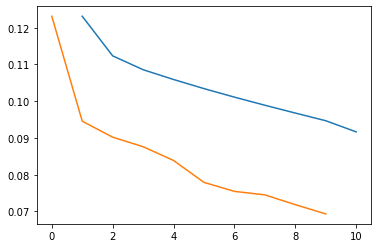

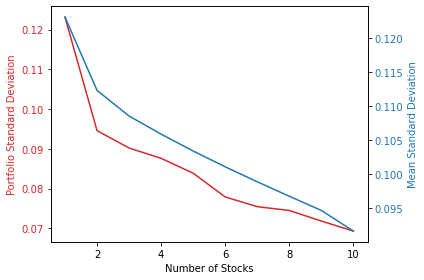

In [22]:
x_axis = [1,2,3,4,5,6,7,8,9,10]
y_axis_rmean = [rstd1_mean, rstd2_mean, rstd3_mean, rstd4_mean, rstd5_mean, rstd6_mean, rstd7_mean, rstd8_mean, rstd9_mean, rstd10_mean]
y_axis_PF_std = [rstd1, PF2_Std, PF3_Std, PF4_Std, PF5_Std, PF6_Std, PF7_Std, PF8_Std, PF9_Std, PF10_Std]

fig2 = plt.plot(x_axis, y_axis_rmean, y_axis_PF_std)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Stocks')
ax1.set_ylabel('Portfolio Standard Deviation', color=color)
ax1.plot(x_axis, y_axis_PF_std, color = color)
ax1.tick_params(axis = 'y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Mean Standard Deviation', color=color)
ax2.plot(x_axis, y_axis_rmean, color = color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

## Task 3: Mean-Variance Frontier and Portfolio Choice

### a)

In [23]:
# Discrete monthly return series from before
print(returns.head(n = 5))

            DEUTSCHE_BANK   ALLIANZ      BASF   SIEMENS       BMW     BAYER  \
1996-08-23       0.005421  0.035851  0.085921  0.023022  0.018961  0.062685   
1996-09-23      -0.029687 -0.004419  0.082109  0.003933  0.011622  0.038204   
1996-10-23      -0.004588  0.029361  0.029044  0.011900  0.033911  0.042568   
1996-11-23      -0.003359  0.007230  0.085472 -0.104982  0.039467  0.019031   
1996-12-23       0.000293 -0.003587  0.113851 -0.001529  0.128339  0.032261   

                E_ON       RWE    HENKEL       SAP  
1996-08-23  0.027119  0.030107  0.015875  0.106914  
1996-09-23  0.015450  0.031968  0.015520  0.063693  
1996-10-23  0.057710  0.146010  0.027635 -0.176907  
1996-11-23  0.035129  0.027803  0.126821 -0.048978  
1996-12-23  0.023631 -0.012378 -0.026487  0.075002  


In [24]:
# Risk Free Interest Rate
rf_return = 0.08/100
# Annualized Risk Free Interest Rate
rf_return = rf_return * 12

In [25]:
# Monthly Expected Returns
mean_returns = returns.mean(axis = 0, skipna = True)
# Annualized Expected Returns
mean_returns = mean_returns * 12
print(mean_returns)

DEUTSCHE_BANK    0.069372
ALLIANZ          0.117179
BASF             0.154088
SIEMENS          0.155251
BMW              0.152583
BAYER            0.104574
E_ON             0.075657
RWE              0.091904
HENKEL           0.122083
SAP              0.177752
dtype: float64


In [26]:
# Monthly Standard Deviation
std = returns.std(axis = 0, skipna = True)
# Annualized Standard Deviation
std = np.sqrt(12) * std
print(std)

DEUTSCHE_BANK    0.426518
ALLIANZ          0.350028
BASF             0.283615
SIEMENS          0.339217
BMW              0.323900
BAYER            0.296909
E_ON             0.270180
RWE              0.310031
HENKEL           0.222917
SAP              0.351835
dtype: float64


In [27]:
std_returns = pd.concat([mean_returns, std], axis = 1)
std_returns.rename(columns = {0: 'return', 1: 'std'}, inplace = True)
print(std_returns)

                 return       std
DEUTSCHE_BANK  0.069372  0.426518
ALLIANZ        0.117179  0.350028
BASF           0.154088  0.283615
SIEMENS        0.155251  0.339217
BMW            0.152583  0.323900
BAYER          0.104574  0.296909
E_ON           0.075657  0.270180
RWE            0.091904  0.310031
HENKEL         0.122083  0.222917
SAP            0.177752  0.351835


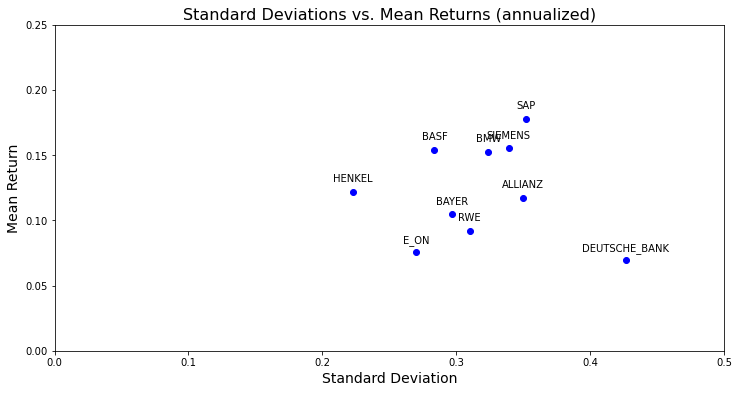

In [28]:
plt.figure(figsize = (12,6))
plt.plot(std_returns['std'], std_returns['return'], linestyle = "None", marker = 'o', color = 'blue')
for i in range(0, len(std_returns)):
    index = std_returns.index.to_numpy()
    label = index[i]
    plt.annotate(label, (std_returns.iloc[i,1], std_returns.iloc[i,0]), textcoords = "offset points", xytext = (0, 10), ha = 'center')
plt.title('Standard Deviations vs. Mean Returns (annualized)', size = 16)
plt.xlabel('Standard Deviation', size = 14)
plt.ylabel('Mean Return', size = 14)
plt.xlim(0, 0.5)
plt.ylim(0, 0.25)
plt.show()

### b)

In [29]:
portfolio_returns = [] 
portfolio_stds = []
portfolio_weights = [] 

num_assets = len(returns.columns)
num_portfolios = 1000

cov_matrix = returns.cov()
cov_matrix = cov_matrix * 12

np.random.seed(123)
for z in range(0, int(num_portfolios/(num_assets**2))):
    for i in range(0, num_assets):
        weights = np.random.random(num_assets-i)
        weights = np.append(weights, np.zeros(i))
        weights = weights/np.sum(weights)
        for j in range(0, num_assets):
            # Portfolio Weights
            weights = deque(weights)
            weights.rotate(i)
            weights = np.array(weights)
            portfolio_weights.append(weights)
            # Portfolio Returns
            returns = np.dot(weights, std_returns['return'])
            portfolio_returns.append(returns)
            # Portfolio Volatlity (Stds)
            var = np.dot(weights.T, np.dot(cov_matrix, weights))
            std = np.sqrt(var)
            portfolio_stds.append(std)

portfolio_std_returns = pd.DataFrame({'return': portfolio_returns, 'std': portfolio_stds})
print(portfolio_std_returns)

       return       std
0    0.114291  0.238019
1    0.114291  0.238019
2    0.114291  0.238019
3    0.114291  0.238019
4    0.114291  0.238019
..        ...       ...
995  0.152583  0.323900
996  0.155251  0.339217
997  0.154088  0.283615
998  0.117179  0.350028
999  0.069372  0.426518

[1000 rows x 2 columns]


In [30]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.dot(weights, std_returns['return'])
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [31]:
eff_portfolios = pd.DataFrame()

frontier_y = np.linspace(0, 0.4, 10000)
frontier_x = []

init_guess = [1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10]

for possible_return in frontier_y:
    cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1}, {'type': 'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    result = minimize(minimize_volatility, init_guess, method = 'SLSQP', constraints = cons)
    for i in range(0, num_assets):
        if i == 0:
            eff_portfolios.loc[len(eff_portfolios), i] = result['x'][i] # jac
        else:
            eff_portfolios.loc[len(eff_portfolios) - 1, i] = result['x'][i] # jac
    eff_portfolios.loc[len(eff_portfolios) - 1, num_assets] = result['fun']
    eff_portfolios.loc[len(eff_portfolios) - 1, num_assets + 1] = possible_return
    eff_portfolios.loc[len(eff_portfolios) - 1, num_assets + 2] = possible_return/result['fun']
    frontier_x.append(result['fun'])

eff_portfolios.rename(columns = {0: 'w_DEUTSCHE_BANK', 1: 'w_ALLIANZ', 2: 'w_BASF', 3: 'w_SIEMENS', 4: 'w_BMW', 5: 'w_BAYER', 6: 'w_E_ON', 7: 'w_RWE', 8: 'w_HENKEL', 9: 'w_SAP', 10: 'std', 11: 'return', 12: 'sharpe_ratio'}, inplace = True)
print(eff_portfolios.head(n = 10))

   w_DEUTSCHE_BANK  w_ALLIANZ    w_BASF  w_SIEMENS     w_BMW   w_BAYER  \
0         0.445416  -0.122159 -0.891107  -0.236426  0.013897  0.585606   
1         0.445241  -0.122136 -0.890812  -0.236348  0.013913  0.585459   
2         0.445066  -0.122113 -0.890516  -0.236270  0.013929  0.585313   
3         0.444891  -0.122090 -0.890219  -0.236191  0.013945  0.585166   
4         0.444716  -0.122068 -0.889923  -0.236113  0.013960  0.585020   
5         0.444541  -0.122046 -0.889625  -0.236035  0.013976  0.584873   
6         0.444366  -0.122024 -0.889328  -0.235957  0.013991  0.584726   
7         0.444192  -0.122002 -0.889030  -0.235878  0.014006  0.584579   
8         0.444017  -0.121980 -0.888732  -0.235800  0.014020  0.584431   
9         0.443842  -0.121959 -0.888434  -0.235721  0.014035  0.584284   

     w_E_ON     w_RWE  w_HENKEL     w_SAP       std   return  sharpe_ratio  
0  0.904941 -0.105153  0.659573 -0.254588  0.333888  0.00000       0.00000  
1  0.904747 -0.105149  0.659547

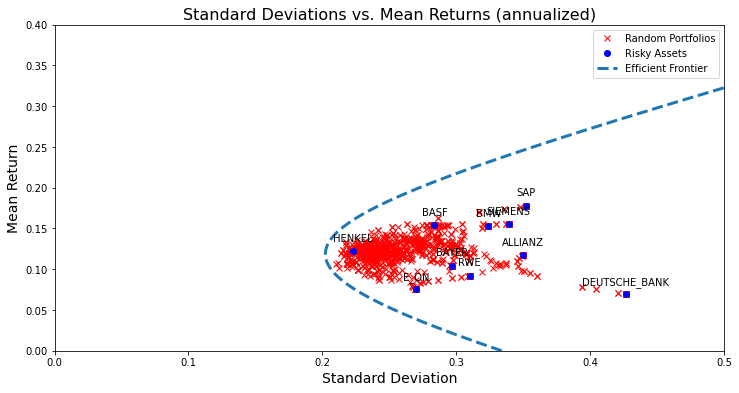

In [32]:
plt.figure(figsize = (12,6))
plt.plot(portfolio_std_returns['std'], portfolio_std_returns['return'], linestyle = "None", marker = 'x', color = 'red', label = 'Random Portfolios')
plt.plot(std_returns['std'], std_returns['return'], linestyle = "None", marker = 'o', color = 'blue', label = 'Risky Assets')
plt.plot(frontier_x, frontier_y, linestyle = '--', linewidth = 3, label = 'Efficient Frontier')
for i in range(0, len(std_returns)):
    index = std_returns.index.to_numpy()
    label = index[i]
    plt.annotate(label, (std_returns.iloc[i,1], std_returns.iloc[i,0]), textcoords = "offset points", xytext = (0, 10), ha = 'center')
plt.title('Standard Deviations vs. Mean Returns (annualized)', size = 16)
plt.xlabel('Standard Deviation', size = 14)
plt.ylabel('Mean Return', size = 14)
plt.xlim(0, 0.5)
plt.ylim(0, 0.4)
plt.legend()
plt.show()

### c)

In [33]:
min_var_portfolio = eff_portfolios[eff_portfolios['std'] == eff_portfolios['std'].min()]
min_var_portfolio['w_sum'] = np.sum(min_var_portfolio.to_numpy()[0][0:10])
print("\nMininum-Variance Portfolio:\n\n", min_var_portfolio)


Mininum-Variance Portfolio:

       w_DEUTSCHE_BANK  w_ALLIANZ    w_BASF  w_SIEMENS     w_BMW   w_BAYER  \
2964        -0.066436  -0.071499  0.056154  -0.005552  0.009113  0.130691   

        w_E_ON     w_RWE  w_HENKEL     w_SAP       std    return  \
2964  0.273466 -0.001065  0.572786  0.102341  0.202217  0.118572   

      sharpe_ratio  w_sum  
2964       0.58636    1.0  


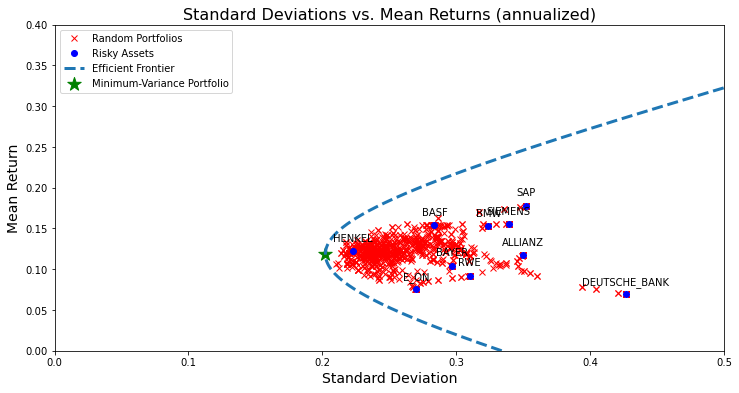

In [34]:
plt.figure(figsize = (12,6))
plt.plot(portfolio_std_returns['std'], portfolio_std_returns['return'], linestyle = "None", marker = 'x', color = 'red', label = 'Random Portfolios')
plt.plot(std_returns['std'], std_returns['return'], linestyle = "None", marker = 'o', color = 'blue', label = 'Risky Assets')
plt.plot(frontier_x, frontier_y, linestyle = '--', linewidth = 3, label = 'Efficient Frontier')
plt.scatter(min_var_portfolio['std'], min_var_portfolio['return'], color = 'green', marker = '*', s = 200, label = 'Minimum-Variance Portfolio')
for i in range(0, len(std_returns)):
    index = std_returns.index.to_numpy()
    label = index[i]
    plt.annotate(label, (std_returns.iloc[i,1], std_returns.iloc[i,0]), textcoords = "offset points", xytext = (0, 10), ha = 'center')
plt.title('Standard Deviations vs. Mean Returns (annualized)', size = 16)
plt.xlabel('Standard Deviation', size = 14)
plt.ylabel('Mean Return', size = 14)
plt.xlim(0, 0.5)
plt.ylim(0, 0.4)
plt.legend()
plt.show()

### d)

In [35]:
tan_portfolio = eff_portfolios[eff_portfolios['sharpe_ratio'] == eff_portfolios['sharpe_ratio'].max()]
tan_portfolio['w_sum'] = np.sum(tan_portfolio.to_numpy()[0][0:10])
print("\nTangency Portfolio:\n\n", tan_portfolio)


Tangency Portfolio:

       w_DEUTSCHE_BANK  w_ALLIANZ    w_BASF  w_SIEMENS     w_BMW   w_BAYER  \
4688        -0.364317  -0.040848  0.605459   0.128199  0.007585 -0.133672   

        w_E_ON     w_RWE  w_HENKEL     w_SAP       std    return  \
4688 -0.093512  0.057294  0.524171  0.309642  0.254532  0.187539   

      sharpe_ratio  w_sum  
4688      0.736797    1.0  


In [36]:
a = (tan_portfolio['return'] - rf_return) / (tan_portfolio['std'] - 0)
b = rf_return - a * 0
tan_x = np.linspace(0, 1, 100)
tan_y = []
for x in tan_x:
    y = (a*x)+b
    tan_y.append(y)

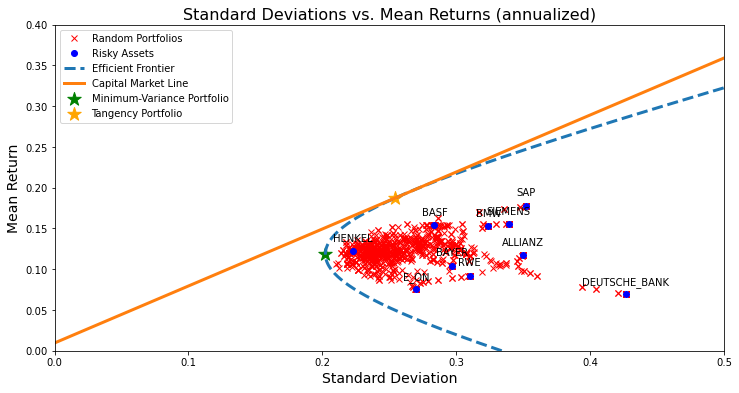

In [37]:
plt.figure(figsize = (12,6))
plt.plot(portfolio_std_returns['std'], portfolio_std_returns['return'], linestyle = "None", marker = 'x', color = 'red', label = 'Random Portfolios')
plt.plot(std_returns['std'], std_returns['return'], linestyle = "None", marker = 'o', color = 'blue', label = 'Risky Assets')
plt.plot(frontier_x, frontier_y, linestyle = '--', linewidth = 3, label = 'Efficient Frontier')
plt.scatter(min_var_portfolio['std'], min_var_portfolio['return'], color = 'green', marker = '*', s = 200, label = 'Minimum-Variance Portfolio')
plt.scatter(tan_portfolio['std'], tan_portfolio['return'], color = 'orange', marker = '*', s = 200, label = 'Tangency Portfolio')
plt.plot(tan_x, tan_y, linestyle = '-', linewidth = 3, label = 'Capital Market Line')
for i in range(0, len(std_returns)):
    index = std_returns.index.to_numpy()
    label = index[i]
    plt.annotate(label, (std_returns.iloc[i,1], std_returns.iloc[i,0]), textcoords = "offset points", xytext = (0, 10), ha = 'center')
plt.title('Standard Deviations vs. Mean Returns (annualized)', size = 16)
plt.xlabel('Standard Deviation', size = 14)
plt.ylabel('Mean Return', size = 14)
plt.xlim(0, 0.5)
plt.ylim(0, 0.4)
plt.legend()
plt.show()

### e)

In [38]:
k = 2
tan_return = tan_portfolio['return']

def get_utility(weights):
    weights = np.array(weights)
    utility = (weights[0] * tan_return) + rf_return - (0.5*k*(weights[0]**2)*tan_portfolio['std'])
    return utility

def maximize_utility(weights):
    return -get_utility(weights)
    
init_guess = [1/2, 1/2]
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
result = minimize(maximize_utility, init_guess, method = 'SLSQP', constraints = cons)

# Results
print("\nOptimal allocation for portfolio in ETF and risk-free asset:\n")
print("Weight in ETF:", round(result['x'][0]*100, 2), "%")
print("Weight in risk-free asset:", round(result['x'][1]*100, 2), "%")


Optimal allocation for portfolio in ETF and risk-free asset:

Weight in ETF: 36.84 %
Weight in risk-free asset: 63.16 %
